In [18]:
!pip install mlxtend

In [33]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('basket_analysis.csv')

In [35]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [36]:
print("Encoded Dataset:")
print(df_encoded)

Encoded Dataset:
                0      :      A      B      C      D      E      I      K  \
0     True   True   True  False  False  False  False  False  False  False   
1    False  False  False   True  False  False  False  False  False  False   
2    False  False  False  False   True  False  False  False  False  False   
3    False  False  False  False   True  False  False  False  False  False   
4    False  False  False  False  False   True  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
994  False  False  False  False  False  False  False  False  False  False   
995  False  False  False  False  False  False  False  False  False  False   
996  False  False  False  False  False  False  False  False  False  False   
997  False  False  False  False  False  False  False  False  False  False   
998  False  False  False  False  False  False  False  False  False  False   

     ...      l      m      n      o      p      r      s 

In [37]:
basket_sets = data.drop(columns=['Unnamed: 0'])

In [38]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)

In [39]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [40]:
print("Sık Alınan Ürünler:")
print(frequent_itemsets)

Sık Alınan Ürünler:
      support                        itemsets
0    0.383383                         (Apple)
1    0.384384                         (Bread)
2    0.420420                        (Butter)
3    0.404404                        (Cheese)
4    0.407407                          (Corn)
..        ...                             ...
164  0.101101  (Ice cream, Nutmeg, chocolate)
165  0.101101   (Onion, Ice cream, chocolate)
166  0.100100    (Kidney Beans, Nutmeg, Milk)
167  0.101101  (Kidney Beans, Nutmeg, Yogurt)
168  0.104104       (Yogurt, chocolate, Milk)

[169 rows x 2 columns]


In [41]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
           antecedents          consequents  antecedent support  \
0              (Apple)              (Bread)            0.383383   
1              (Bread)              (Apple)            0.384384   
2              (Apple)             (Butter)            0.383383   
3             (Butter)              (Apple)            0.420420   
4              (Apple)             (Cheese)            0.383383   
..                 ...                  ...                 ...   
431     (Yogurt, Milk)          (chocolate)            0.190190   
432  (Milk, chocolate)             (Yogurt)            0.211211   
433           (Yogurt)    (Milk, chocolate)            0.420420   
434        (chocolate)       (Yogurt, Milk)            0.421421   
435             (Milk)  (Yogurt, chocolate)            0.405405   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.384384  0.154154    0.402089  1.046059  0.006788    1.029610   
1            

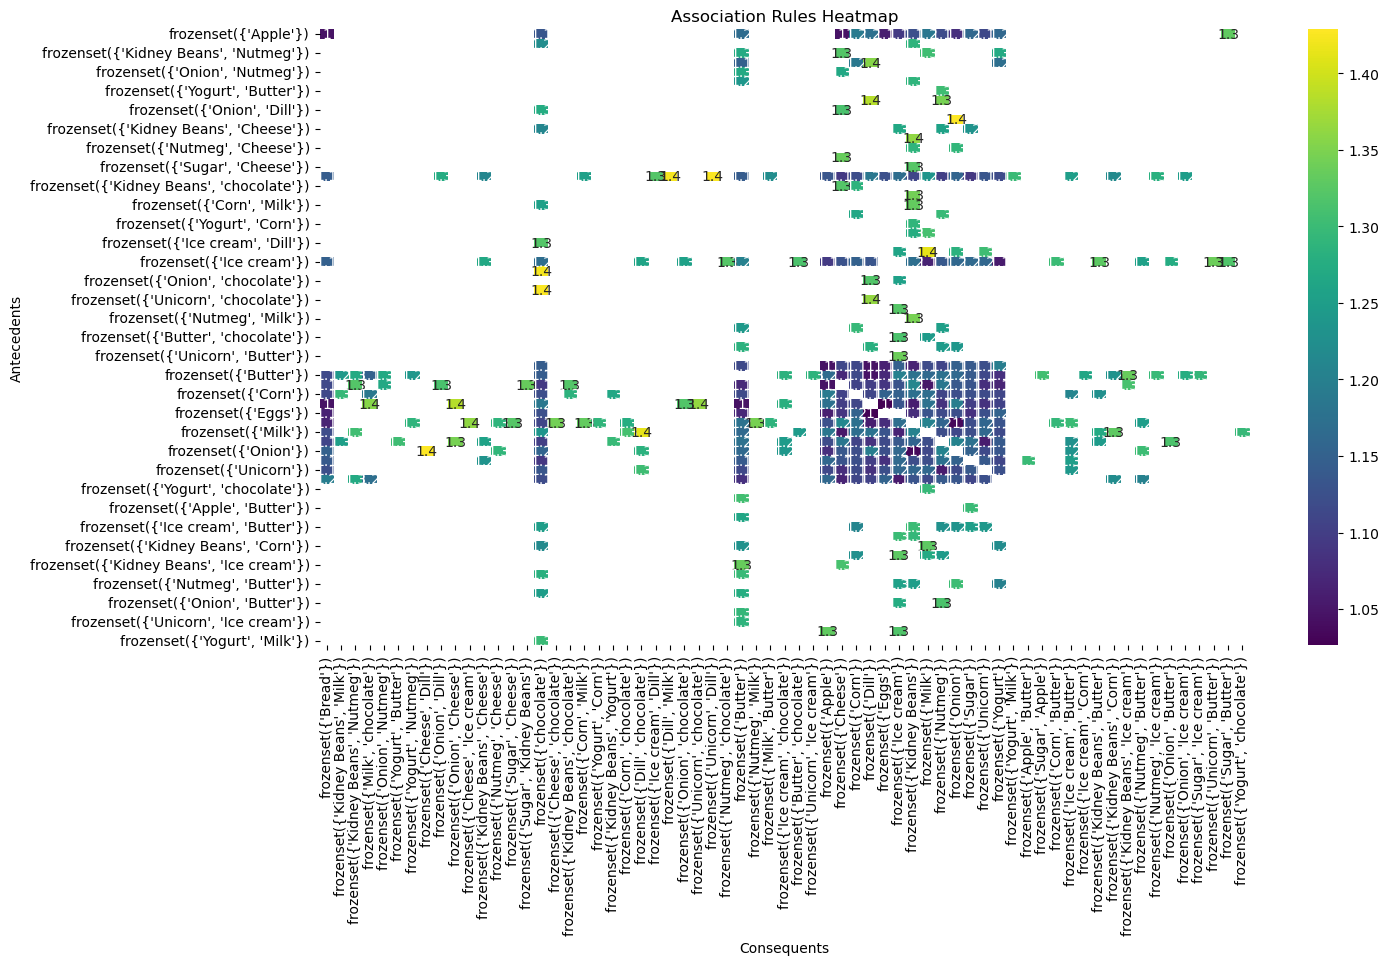

In [44]:
plt.figure(figsize=(15, 8))
sns.heatmap(rules.pivot(index='antecedents', columns='consequents', values='lift'), annot=True, cmap='viridis')
plt.title('Association Rules Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()